# Problem 2 Word2Vec & Seq2Seq Models
---------

## Setup

In [7]:
import os, sys, tqdm, json, pickle, random, warnings
from typing import List, Optional

import numpy as np, pandas as pd

import matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns

import torch, torch.nn as nn, torch.optim as optim
import pytorch_lightning as pl
from torch.utils import data

from gensim.models import Word2Vec, Phrases
from gensim.test.utils import common_texts
import gensim, gensim.downloader as gensim_api
from gensim import corpora

from gensim.parsing.preprocessing import remove_stopwords, preprocess_documents
from gensim.utils import simple_preprocess

pl.seed_everything(3)

Global seed set to 3


3

### Global Variables

**NOTE**: you can find other `gensim` datasets [here](https://github.com/RaRe-Technologies/gensim-data#datasets)

In [8]:
SAVE_DIR = os.path.abspath('.')

W2V_FILE = os.path.join(SAVE_DIR, 'word2vec.pth')

CORPUS = 'text8'

TXT_FILE = os.path.join(SAVE_DIR, f'{CORPUS}.pkl')

OVERWRITE = False

VEC_SIZE = 2 #10

DEVICE = 'cpu'

SAVE_DIR

'/Users/default/Google Drive/currentDocumants/studies/Master/6.Semester/deep_learning/pset/pset3'

## Part 1

### Fetch you text corpus

**TODO**: generate your own word-vector embedding using a text corpus of _your_ choice of at least **500** words. You may use `gensim`'s corpora.

Feel free to play with hyperparmaters in the notebook such as context size and embedding size.

In [14]:
corpus = gensim_api.load('text8')

In [11]:
#does_corpus_exist = os.path.isfile(TXT_FILE)

#if not does_corpus_exist or OVERWRITE:
#    corpus = gensim_api.load(CORPUS)
#    with open(TXT_FILE, 'wb') as f:
#        pickle.dump(corpus, f)

#else:
#    with open(TXT_FILE, 'rb') as f:
 #       corpus = pickle.load(f)

#corpus

ModuleNotFoundError: No module named 'text8'

In [15]:
for i, word in enumerate(corpus):
    if i < 3:
        print(word)

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers', 'to', 'related', 'so

### Train your Word2Vec Model

**NOTE**: you are free to create your own Word2Vec model. You are welcome to use `gensim`. However for the pset you must at least _train_ a Word2Vec model!

In [16]:
W2V_FILE

'/Users/default/Google Drive/currentDocumants/studies/Master/6.Semester/deep_learning/pset/pset3/word2vec.pth'

In [17]:
does_model_exist = os.path.isfile(W2V_FILE)

if not does_model_exist or OVERWRITE:
    w2v = Word2Vec(
        # NOTE: you can use either a list of strings (sentences)
        # or provide a corpus_file
        corpus, 
        
        # Dimensionality of the word vectors.
        vector_size=VEC_SIZE, 
        
        # Maximum distance between the current and predicted word within a sentence.
        window=5, 

        # Ignores all words with total frequency lower than this.
        min_count=1,

        # Training algorithm: 1 for skip-gram; otherwise CBOW.
        sg = 1,
        
        # Use these many worker threads to train the model (=faster training 
        # with multicore machines).
        workers=32,

        # If 0, use the sum of the context word vectors. If 1, use the mean, 
        # only applies when cbow is used.
        cbow_mean = 1,

        # Number of iterations (epochs) over the corpus. (Formerly: iter)
        epochs=10#100
    )

    w2v.add_null_word()

    w2v.save(W2V_FILE)

else:

     w2v = Word2Vec.load(W2V_FILE)

In [18]:
def vec_math(model, *args, return_str_description:bool=False):
    desc = ''
    func = np.add  
    # NOTE: vector_size  
    vect = None
    
    for arg in args:
        if arg == '+':
            desc += ' + '
            func = np.add
        elif arg == '-':
            desc += ' - '
            func = np.subtract
        elif arg == '/':
            desc += ' / '
            func = np.divide
        elif arg == '*':
            desc += ' * '
            func = np.multiply
        else:
            desc += arg
            curr = model.wv[arg]
            if vect is None:
                vect = curr.copy()
            else:
                vect = func(vect, curr)

    if return_str_description:
        return desc, vect

    return vect


In [ ]:
# Simple utility function for doing vector math based on a string
#def vec_math(model, *args, return_str_description:bool=False):    
#    desc = ''
#    func = np.add  
    # NOTE: vector_size  
#    vect = None
    
#    for arg in args:
#        match arg:
#            case '+':
#                desc+= ' + '
#                func = np.add

#            case '-':
#                desc+= ' - '
#                func = np.subtract
#                
#            case '/':
#                desc+= ' / '
#                func = np.divide#

#            case '*':
#                desc+= ' * '
#                func = np.multiply

#            case _:
#                desc += arg
#                curr = model.wv[arg]
#                if vect is None:
#                    vect = curr.copy()
#                else:
#                    vect = func(vect, curr)

#    if return_str_description:
#        desc, vect

#    return vect


SyntaxError: invalid syntax (3959814802.py, line 9)

#### Explore results

NOTE: here my model had 

$$
woman + man - king = girl
$$

and

$$
news + truth - lies = blogging
$$ 

In [19]:
# woman + man - king = ?
gsm_res = w2v.wv.most_similar(positive=['woman','man'], negative=['king'])[0]
gsm_res

('fsk', 1.0000001192092896)

In [20]:
# news + truth - lies = ?
gsm_res = w2v.wv.most_similar(positive=['news','truth'], negative=['lies'])[0]
gsm_res

('journaling', 1.0000001192092896)

#### Visualize

**TODO**: Plot these word embeddings (all words) by adjusting the code in the notebook.

You are able to adjust the plotting parameters to suit your needs for making a compelling visualization. 
Discuss what you notice in your embeddings. For example, using the introduction to Charles Darwin's "_On the Origin of Species_" 
as a text file, we obtain the embeddings in Figure 2

In [21]:
# TODO: modified code from below here
w2v.wv['news']

array([0.7188908, 1.3029444], dtype=float32)

**TODO**: Since this is too crowded to interpret, modify the code in the notebook to randomly select words to plot as long as there is space as shown in Figure 3

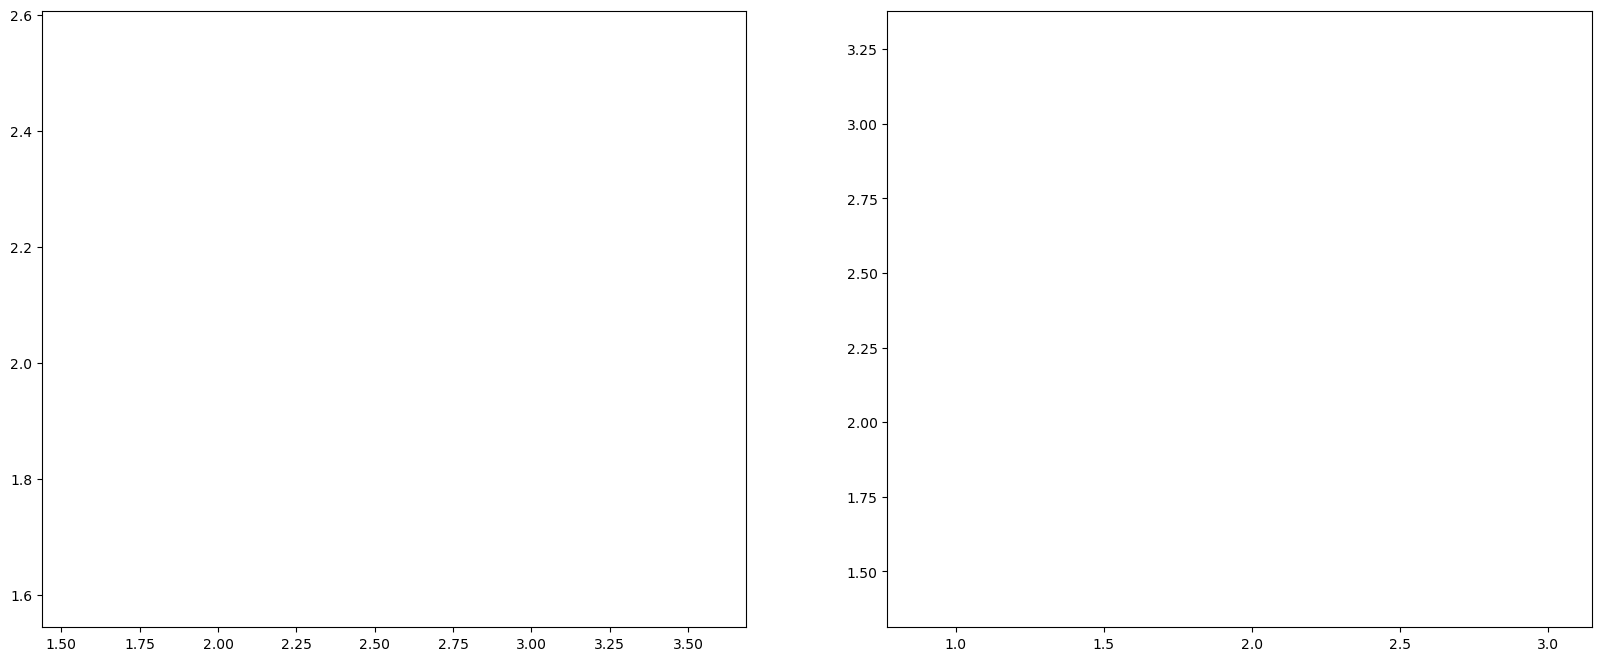

In [ ]:
fig = plt.figure(figsize=(20, 8))
lim_scale = 2

word_groups = [
    'computer,news,truth,lies,blogging,news + truth - lies'.split(','), 
    'man,king,woman,queen,woman + man - king'.split(','), 
]

for i, words in enumerate(word_groups):
    ax = fig.add_subplot(1, 2, i+1)
    single_words = list(filter(lambda e: e.isalpha(), words))
    domath_words = list(filter(lambda e: not e.isalpha(), words))

    vecs = w2v.wv[single_words]
    for w in domath_words:        
        v = vec_math(w2v, *w.split())
        vecs = np.vstack((vecs, v))      

    min_vals = np.min(vecs, axis=0)
    max_vals = np.max(vecs, axis=0)  

    ax.set_xlim(min_vals[0] * lim_scale, max_vals[0] * lim_scale)
    ax.set_ylim(min_vals[1] * lim_scale, max_vals[1] * lim_scale)

    for j, vec in enumerate(vecs):
        word = words[j]

        plt.scatter(vec[0], vec[1])
        plt.annotate(
            word, xy=(0, 0),  xytext=(vec[0], vec[1]), 
            arrowprops=dict(arrowstyle="<-")
        )



In [22]:
#extract words from corpus
words_from_corpus = []
for word in corpus:
    words_from_corpus.append(word)

#words_from_corpus = np.array(words_from_corpus).flatten()
words_from_corpus = np.concatenate(words_from_corpus)


subset, todo delete

In [23]:
words_from_corpus = words_from_corpus[1:300]

(1.173379898071289, 4.138782978057861)

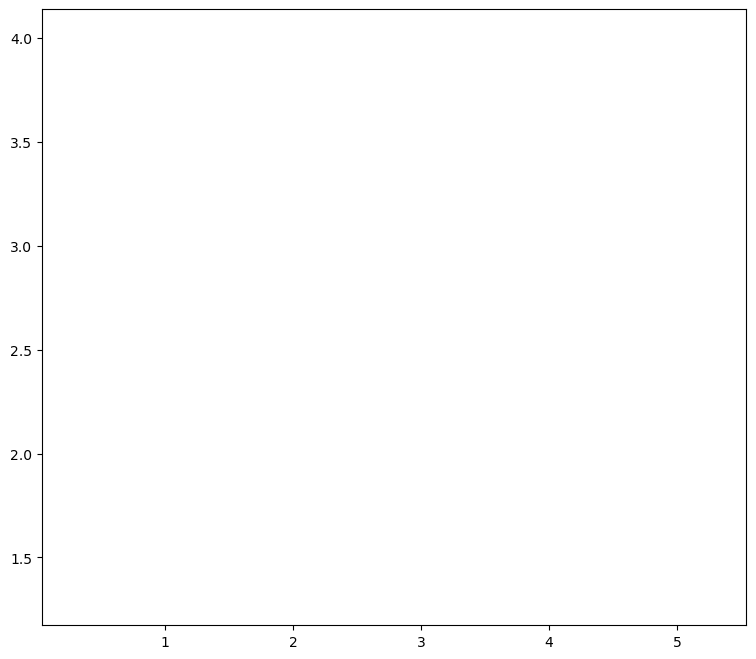

In [25]:
fig = plt.figure(figsize=(20, 8))
lim_scale = 2

ax = fig.add_subplot(1, 2, 1)

vecs = w2v.wv[words_from_corpus]
    
min_vals = np.min(vecs, axis=0)
max_vals = np.max(vecs, axis=0)

ax.set_xlim(min_vals[0] * lim_scale, max_vals[0] * lim_scale)
ax.set_ylim(min_vals[1] * lim_scale, max_vals[1] * lim_scale)

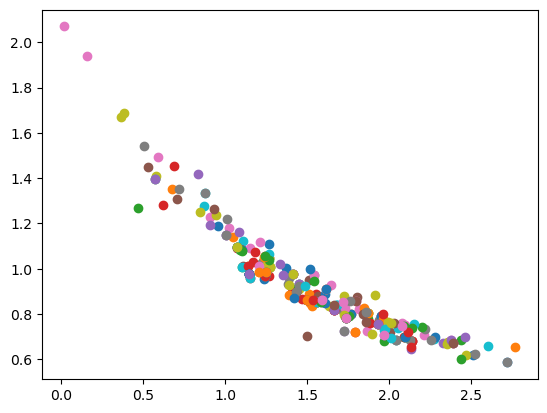

In [26]:
for j, vec in enumerate(vecs):
    word = words_from_corpus[j]

    plt.scatter(vec[0], vec[1])
    #print(j, word, vec[0], vec[1])
    plt.annotate(
        word, xy=(0, 0),  xytext=(vec[0], vec[1]),
        arrowprops=dict(arrowstyle="<-")
    )
plt.show()

## Part 2

### Dataset

Whether or not you used `gensim` for training the `Word2Vec` model you will be using PyTorch Lightning for the `Seq2Seq` model. To make this easier on you, you will need to create a `data.Dataset` object which contains, at the very least, `__getitem__` and `__len__` methods to yield items during training. Below is an example which converts a `gensim` corpus paired batches of the first 300 words per doc.

In [10]:
class Seq2SeqTextDataset(data.Dataset):
    def __init__(self, corpus, keyed_vecs, reverse_target:bool=False):        
        self.corpus = corpus
        self.keyed_vecs = keyed_vecs
        
        docs = self.docs_from_corpus(corpus)
        self.docs = docs
        self.data = docs

        corpora_dct = corpora.Dictionary(docs)
        self.corpora_dct = corpora_dct

        bows = self.bows_from_docs(docs, corpora_dct)
        self.bows = bows
        
        self.reverse_target = reverse_target

    def docs_from_corpus(self, corpus):
        docs = [
            simple_preprocess(remove_stopwords(' '.join(doc)))[:300] #will have to reduce this
            for doc in corpus
        ]
        return docs
        
    def bows_from_docs(self, docs, dct):
        return [dct.doc2bow(doc) for doc in docs]


    def __len__(self):        
        return int(len(self.docs))

    def __getitem__(self, idx):
        doc = self.docs[idx]

        source = torch.tensor([self.keyed_vecs.get_index(word) for word in doc])      
        
        target = [self.keyed_vecs.get_index(word) for word in doc]
        if self.reverse_target:
            target = target[::-1]
        target = torch.tensor(target)

        return source, target

### Seq2Seq Model

#### Encoder

**TODO**: fill in the `encode` method

In [ ]:
class Encoder(nn.Module):
    def __init__(
        self, 
        n_vocabsize:int, n_embedding:int, n_hidden:int, n_layers:int, 
        dropout:Optional[float]=0.1, pretrained:Optional[np.ndarray]=None,
    ):
        super(Encoder, self).__init__()
                
        self.n_vocabsize = n_vocabsize
        self.n_embedding = n_embedding
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.dropout = dropout

        embedding = self.make_embedding_layer(n_vocabsize, n_embedding, pretrained)
        self.embedding = embedding

        # NOTE: depending on your dataset you may have to change batch_first
        self.lstm = nn.LSTM(n_embedding, n_hidden, n_layers, dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(dropout)

    def make_embedding_layer(
        self, 
        n_vocabsize:int, 
        n_embedding:int,
        pretrained:Optional[np.ndarray]=None,
    ):
        if pretrained is not None:
            pretrained = np.array(pretrained)
            n_vocabsize, n_embedding = pretrained.shape
            
            self.n_vocabsize = n_vocabsize
            self.n_embedding = n_embedding

            pretrained = torch.FloatTensor(pretrained) 
            embedding = nn.Embedding.from_pretrained(pretrained)

        else:
            embedding = nn.Embedding(n_vocabsize, n_embedding)

        return embedding
    

    def encode(self, x):
       # TODO: fill this in
       pass
    
    def forward(self, x):
        return self.encode(x)

#### Decoder

**TODO**: fill in the `decode` method

In [ ]:
class Decoder(nn.Module):
    def __init__(
        self,
        n_vocabsize:int, n_embedding:int, n_hidden:int, n_layers:int, 
        dropout:Optional[float]=0.1,
    ):
        super(Decoder, self).__init__()
        self.n_vocabsize = n_vocabsize
        self.n_embedding = n_embedding
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.dropout = dropout

        self.embedding = nn.Embedding(n_vocabsize, n_embedding)
        self.lstm = nn.LSTM(n_embedding, n_hidden, n_layers, dropout=dropout, batch_first=False)
        self.fc_out = nn.Linear(n_hidden, n_vocabsize)
        self.dropout = nn.Dropout(dropout)

    def decode(self, x, hidden, cell):
        # TODO: fill this in
        pass

    
    def forward(self, x, hidden, cell):
        return self.decode(x, hidden, cell)
    

#### Seq2Seq LightningModule

**TODO**: fill in the `do_seq2seq` method and define the `criterion`

In [49]:
class Seq2Seq(pl.LightningModule):    
    def __init__(
        self, 
        word_2_vec,
        train_loader,
        n_vocabsize:int=0, 
        n_hidden:int = 2,
        n_layers:int = 2,
        dropout:float = 0.2,
        teacher_forcing_ratio:float=0.5,
        learning_rate:float=0.01,
    ):
                
        super(Seq2Seq, self).__init__()

        self.w2v = word_2_vec
        self.train_loader = train_loader

        n_embedding = word_2_vec.vector_size
        n_vocabsize, n_embedding = np.array(word_2_vec.wv).shape

        self.n_vocabsize = n_vocabsize
        self.n_embedding = n_embedding
        self.n_hidden = n_hidden
        self.n_layers = n_layers
        self.n_output = n_vocabsize

        self.teacher_forcing_ratio = teacher_forcing_ratio
        self.learning_rate = learning_rate
        
        self.encoder = Encoder(
            n_vocabsize, n_embedding, n_hidden, n_layers, 
            dropout, pretrained=np.array(word_2_vec.wv)
        )
        self.decoder = Decoder(
            n_vocabsize, n_embedding, n_hidden, n_layers, dropout,
        )

        # TODO: self.criterion = loss_fn

    def train_dataloader(self):
        return self.train_loader

    def configure_optimizers(self):
        optimizer = torch.optim.AdamW(self.parameters(), lr=self.learning_rate, weight_decay=1e-5)
        scheduler = optim.lr_scheduler.StepLR(optimizer, 100, gamma=0.99)
        return [optimizer], [scheduler]
    
    def encode(self, word):
        index = self.w2v.wv.get_index(word)
        return torch.tensor(index)
    
    def do_seq2seq(self, source, target):
        # TODO: fill this in
        pass

    def training_step(self, batch, batch_idx):
        x, y = batch
        source = x
        target = y

        output = self.do_seq2seq(source, target)

        # NOTE: this may not be needed depending on your
        output_dim = output.shape[-1]        
        output = output.view(-1, output_dim)
        target = target.view(-1)


        loss = self.criterion(output, target)

        result = {'loss': loss}
        self.log('loss', loss)
        return result

### Instantiate dataset and dataloader 

In [30]:
ds = Seq2SeqTextDataset(corpus, w2v.wv)

In [31]:
dl = data.DataLoader(ds, batch_size=3, shuffle=True, drop_last=True)

### Instantiate model

In [50]:
s2s = Seq2Seq(
    w2v, dl,
    n_hidden=12, n_layers=4, dropout=0.5
).to(DEVICE)
s2s.encoder.to(DEVICE)
s2s.decoder.to(DEVICE)
s2s

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(253854, 50)
    (lstm): LSTM(50, 12, num_layers=4, batch_first=True, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(253854, 50)
    (lstm): LSTM(50, 12, num_layers=4, dropout=0.5)
    (fc_out): Linear(in_features=12, out_features=253854, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (criterion): CrossEntropyLoss()
)

### Define trainer

In [55]:
trainer = pl.Trainer(
    max_epochs=1,
    
    # NOTE: gradient clipping can help prevent exploding gradients
    gradient_clip_val=100,
    gradient_clip_algorithm='value',    
    log_every_n_steps=5,
    
    # NOTE: this should match your device i.e. if you set cuda above, this should be cuda. 
    # Otherwise it should be cpu. 
    accelerator=DEVICE,    
    
    # NOTE: you can set the maximum time you want to train your model
    max_time={'minutes': 2},    

    # NOTE: setting this to true will save your model every so often
    enable_checkpointing=False,
    accumulate_grad_batches=2
)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/solstice/anaconda3/envs/lstm/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
  warning_cache.warn(


### Train model

**TODO** train your model

In [56]:
trainer.fit(s2s, dl)


  | Name      | Type             | Params
-----------------------------------------------
0 | encoder   | Encoder          | 12.7 M
1 | decoder   | Decoder          | 16.0 M
2 | criterion | CrossEntropyLoss | 0     
-----------------------------------------------
16.0 M    Trainable params
12.7 M    Non-trainable params
28.7 M    Total params
114.797   Total estimated model params size (MB)
/home/solstice/anaconda3/envs/lstm/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Time limit reached. Elapsed time is 0:02:25. Signaling Trainer to stop.
`Trainer.fit` stopped: `max_epochs=1` reached.


**TODO**: Train your network also to reconstruct sentences with some words masked. How well does this training perform? Report accuracy at convergence.

### Evaluation

In [58]:
for source, target in dl:
    break

In [81]:
res = s2s.do_seq2seq(
    source[0, :].unsqueeze(0),
    target[0, :].unsqueeze(0)
)
res = res.squeeze(1)
res.shape

torch.Size([300, 253854])

In [ ]:
[w2v.wv.index_to_key[idx] for idx in res.argmax(1)]

**TODO**: Put in a sentence from the corpus and write its reconstruction. Is the reconstruction perfect?

**TODO**: Now mask one of the words in the sentence with xxxx and test if it fills the word back.

**TODO**: Finally, start a sentence from the corpus by giving the first 3 words, with the rest of the words masked, see if it completes this sentence.

## Exploration

You can also use `gensim` to load other models aside from `Word2Vec` such as `glove` 

In [20]:
glove_vectors = gensim_api.load('glove-twitter-25')
glove_vectors.most_similar('twitter')

## Citations

This notebook adapts parts of [@Ben Trevett](https://github.com/bentrevett)'s PyTorch Seq2Seq [notebook](https://github.com/bentrevett/pytorch-seq2seq/blob/master/1%20-%20Sequence%20to%20Sequence%20Learning%20with%20Neural%20Networks.ipynb). Additionally we utilize parts of both PyTorch's [documentation](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html) as well as [Gensim](https://radimrehurek.com/gensim/intro.html)'s and [Machine Learning Plus](https://www.machinelearningplus.com/)'s [tutorial](https://www.machinelearningplus.com/nlp/gensim-tutorial/)

## Supplementary materials

For those getting started with [`gensim`](https://radimrehurek.com/gensim/intro.html) they may find [Gaurav Padawe](https://medium.com/@grvpdw92) [tutorial](https://medium.com/analytics-vidhya/word2vector-using-gensim-e055d35f1cb4) useful. Of course there is also the official `Word2Vec` `gensim` [tutorial](https://radimrehurek.com/gensim/models/word2vec.html)

For support with [Pylightning](https://lightning.ai/docs/pytorch/stable/) please refer to these documentation pages:
- `Trainer` [documentation](https://lightning.ai/docs/pytorch/stable/common/trainer.html)
- `LightningModule` [documentation](https://lightning.ai/docs/pytorch/stable/common/lightning_module.html)
